# Imports

In [1]:
# import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA


In [2]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [154]:
# Kaylee's directory
# os.chdir('/content/drive/MyDrive/UCF Data Analytics Course/Project 4/Property_Value_NN_Estimator')

# Nathan-Andrew's directory
os.chdir('/content/drive/MyDrive/project_4/Property_Value_NN_Estimator')

# Read and Clean Data

In [155]:
# import data
redfin_df = pd.read_csv("cleaned_data.csv")
redfin_df.head()

,full_address,beds,baths,year_built,sq_ft_interior,sq_ft_lot,price,lat,long,zip_code
0,2326 LUAU ST MESQUITE TX 75150,3,1.5,1966,1356,8303,241183,32.798774,-96.649097,75150
1,1737 HIGHLAND ST MESQUITE TX 75149,3,1.0,1955,1454,7501,218014,32.787427,-96.609647,75149
2,2900 SIDNEY DR MESQUITE TX 75150,3,2.0,1972,1392,7196,241089,32.817247,-96.644125,75150
3,1507 RICHARD ST MESQUITE TX 75149,3,1.0,1957,1313,7501,205940,32.787413,-96.616575,75149
4,806 BRANDON DR SEAGOVILLE TX 75159,5,2.0,2004,1504,8407,275611,32.661589,-96.547004,75159


In [156]:
# Create a copy of the main dataframe
redfin_copy_df = redfin_df.copy()

In [157]:
# Drop columns
redfin_copy_df = redfin_copy_df.drop(columns=['full_address', 'lat', 'long'])
redfin_copy_df.head()

,beds,baths,year_built,sq_ft_interior,sq_ft_lot,price,zip_code
0,3,1.5,1966,1356,8303,241183,75150
1,3,1.0,1955,1454,7501,218014,75149
2,3,2.0,1972,1392,7196,241089,75150
3,3,1.0,1957,1313,7501,205940,75149
4,5,2.0,2004,1504,8407,275611,75159


Text(0, 0.5, 'price')

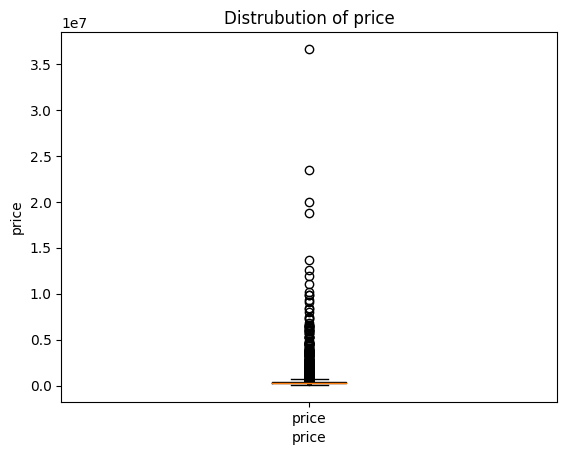

In [158]:
# Create empty list to fill with tumor vol data (for plotting)

# Determine outliers using upper and lower bounds

quartiles = redfin_copy_df["price"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(redfin_copy_df['price'], labels=['price'])

plt.title("Distrubution of price")
plt.xlabel("price")
plt.ylabel("price")

In [159]:
# Undertand the upper_bound outliers
upper_bound

671960.875

In [160]:
# Get rid of the upper outliers
redfin_copy_df = redfin_copy_df[redfin_copy_df['price'] <= 1500000]
redfin_copy_df

,beds,baths,year_built,sq_ft_interior,sq_ft_lot,price,zip_code
0,3,1.5,1966,1356,8303,241183,75150
1,3,1.0,1955,1454,7501,218014,75149
2,3,2.0,1972,1392,7196,241089,75150
3,3,1.0,1957,1313,7501,205940,75149
4,5,2.0,2004,1504,8407,275611,75159
...,...,...,...,...,...,...,...
33203,2,2.0,2006,1362,304920,287949,75051
33204,3,2.0,1972,1774,9204,224423,75051
33205,3,1.5,1972,996,6277,231002,75051
33206,3,1.5,1964,1056,7854,221346,75051


In [161]:
# See how many unique items are in the columns
redfin_copy_df.nunique()

beds                 11
baths                15
year_built          124
sq_ft_interior     3784
sq_ft_lot          5550
price             31616
zip_code             81
dtype: int64

In [162]:
# Understand the datatypes of each series
redfin_copy_df.dtypes

beds                int64
baths             float64
year_built          int64
sq_ft_interior      int64
sq_ft_lot           int64
price               int64
zip_code            int64
dtype: object

In [163]:
# Zip needs to be treated as categorical
redfin_copy_df['zip_code'] = redfin_copy_df['zip_code'].astype(str)
redfin_copy_df.dtypes

beds                int64
baths             float64
year_built          int64
sq_ft_interior      int64
sq_ft_lot           int64
price               int64
zip_code           object
dtype: object

In [164]:
# Convert categorical data
redfin_copy_df = pd.get_dummies(redfin_copy_df)
redfin_copy_df.head()

,beds,baths,year_built,sq_ft_interior,sq_ft_lot,price,zip_code_75001,zip_code_75006,zip_code_75007,zip_code_75019,...,zip_code_75240,zip_code_75241,zip_code_75243,zip_code_75244,zip_code_75246,zip_code_75248,zip_code_75249,zip_code_75252,zip_code_75253,zip_code_75254
0,3,1.5,1966,1356,8303,241183,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,1.0,1955,1454,7501,218014,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,2.0,1972,1392,7196,241089,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,1.0,1957,1313,7501,205940,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,2.0,2004,1504,8407,275611,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Split, Scale, Compile for NN model

In [165]:
# Split preprocessed data into features and targets
y = redfin_copy_df['price'].values
X = redfin_copy_df.drop(columns='price').values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [166]:
# Create the scaler
scaler = StandardScaler()

# Fit the scaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Set up HyperParameter tuning process
## ***SKIP THIS ENTIRE HEADING IF TUNING PROCESS IS ALREADY COMPLETED.***


In [25]:
# Install keras-tuner for hyperparamter tuning later on
# Uncomment when using in Google Colab
!pip install keras-tuner

In [80]:
# Create a method that creates a new Sequential model with hyperparameter options
def create_model(hp):
    nn_model = tf.keras.models.Sequential()

    # Allow kerastuner to decide which activation function to use in hidden layers
    activation = hp.Choice('activation',['relu','tanh','linear','softplus'])
    # activation2 = hp.Choice('activation',['relu','tanh','linear','softplus'])
    activation2 = ['relu','tanh','linear','softplus']


    # Allow kerastuner to decide number of neurons in first layer
    nn_model.add(tf.keras.layers.Dense(units=hp.Int('first_units',
        min_value=1,
        max_value=10,
        step=2), activation=activation, input_dim=87))

    # Allow kerastuner to decide number of hidden layers and neurons in hidden layers
    for i in range(hp.Int('num_layers', 1, 20)):
        nn_model.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
            min_value=1,
            max_value=20,
            step=2),
            activation=activation))

    nn_model.add(tf.keras.layers.Dense(units=1, activation=activation2[3]))

    # Compile the model
    nn_model.compile(loss="mean_absolute_percentage_error", optimizer='adam', metrics=[tf.keras.metrics.RootMeanSquaredError(), 'mae'])

    return nn_model

In [81]:
# Import the kerastuner library
import keras_tuner as kt

# Create tuner and establish parameters
tuner = kt.Hyperband(
    create_model,
    objective="val_loss",
    max_epochs=30,
    hyperband_iterations=2)

Reloading Tuner from ./untitled_project/tuner0.json


KeyboardInterrupt: ignored

In [ ]:
best_model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath='best_model.h5',
    monitor='val_loss',
    mode='min',
    save_best_only=True
)

In [ ]:
# WARNING: THIS WILL TAKE A LONG TIME. LAST RUN WAS 1H 46 MINUTES.
# Run the kerastuner search for best hyperparameters
tuner.search(X_train_scaled, y_train, epochs=20 ,validation_data=(X_test_scaled,y_test))

In [ ]:
# Get top 3 model hyperparameters and print the values
top_hyper = tuner.get_best_hyperparameters(3)
for param in top_hyper:
    print(param.values)

# Set up Model Using tuned parameters

In [135]:
# {'activation': 'relu', 'first_units': 7, 'num_layers': 15, 'units_0': 5, 'units_1': 19, 'units_2': 15, 'units_3': 3, 'units_4': 11, 'units_5': 1, 'units_6': 15, 'units_7': 13, 'units_8': 7, 'units_9': 15, 'units_10': 13, 'units_11': 15, 'units_12': 9, 'units_13': 19, 'units_14': 11, 'units_15': 13, 'units_16': 11, 'units_17': 9, 'units_18': 7, 'units_19': 3, 'tuner/epochs': 30, 'tuner/initial_epoch': 0, 'tuner/bracket': 0, 'tuner/round': 0}

# {'activation': 'softplus',
# 'first_units': 5,
# 'num_layers': 20,
# 'units_0': 15,
# 'units_1': 11,
# 'units_2': 13,
# 'tuner/epochs': 30, 'tuner/initial_epoch': 0, 'tuner/bracket': 0, 'tuner/round': 0}

input_dim = X_train.shape[1]

nn = tf.keras.models.Sequential()

# first hidden layer
# nn.add(tf.keras.layers.Dense(units=15, activation='softplus', input_dim=input_dim))
nn.add(tf.keras.layers.Dense(units=15, activation='relu', input_dim=input_dim))

# 1-2 hidden layer
nn.add(tf.keras.layers.Dense(units=11, activation='linear'))
nn.add(tf.keras.layers.Dense(units=13, activation='linear'))


# Output layer
# nn.add(tf.keras.layers.Dense(units=1, activation='softplus')) # linear relu softplus tanh
nn.add(tf.keras.layers.Dense(units=1, activation='linear')) # linear relu softplus tanh


nn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 15)                1305      
                                                                 
 dense_9 (Dense)             (None, 11)                176       
                                                                 
 dense_10 (Dense)            (None, 13)                156       
                                                                 
 dense_11 (Dense)            (None, 1)                 14        
                                                                 
Total params: 1651 (6.45 KB)
Trainable params: 1651 (6.45 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [136]:
# Compile the model
nn.compile(loss='mean_absolute_percentage_error', optimizer='adam', metrics=[tf.keras.metrics.RootMeanSquaredError(), 'mae'])

In [137]:
# Fit the model
nn.fit(X_train_scaled, y_train, epochs = 100)

Epoch 1/100
772/772 [==============================] - 3s 3ms/step - loss: 95.3261 - root_mean_squared_error: 401107.2188 - mae: 355145.6250
Epoch 2/100
772/772 [==============================] - 3s 4ms/step - loss: 53.0619 - root_mean_squared_error: 326108.0938 - mae: 230862.2812
Epoch 3/100
772/772 [==============================] - 3s 4ms/step - loss: 30.6894 - root_mean_squared_error: 256511.8750 - mae: 147227.7031
Epoch 4/100
772/772 [==============================] - 2s 2ms/step - loss: 19.5687 - root_mean_squared_error: 205470.2969 - mae: 99501.2578
Epoch 5/100
772/772 [==============================] - 2s 3ms/step - loss: 16.2857 - root_mean_squared_error: 177649.8125 - mae: 82165.4375
Epoch 6/100
772/772 [==============================] - 2s 3ms/step - loss: 14.3839 - root_mean_squared_error: 158165.6562 - mae: 71370.0625
Epoch 7/100
772/772 [==============================] - 2s 3ms/step - loss: 13.0751 - root_mean_squared_error: 143484.5156 - mae: 63419.0859
Epoch 8/100
772/7

In [167]:
# Add predictions
predictions = nn.predict(X_test_scaled)
predictions

258/258 [==============================] - 0s 2ms/step


array([[579550.7 ],
       [270276.16],
       [202301.48],
       ...,
       [869048.5 ],
       [197404.06],
       [412024.12]], dtype=float32)

# Adding Predictions to actual dataset

In [168]:
# Create another copy of the orignial dataframe
redfin_original_copy = redfin_df.copy()

# Drop columns
redfin_original_copy = redfin_original_copy.drop(columns=['full_address', 'lat', 'long'])
redfin_original_copy.head()

# Zip needs to be treated as categorical
redfin_original_copy['zip_code'] = redfin_original_copy['zip_code'].astype(str)


In [169]:
# Set up a dataframe for the actuals vs the predicted
y_pred_df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': predictions.flatten()})
y_pred_df['Predicted'] = y_pred_df['Predicted'].astype(int)
y_pred_df.head()

,Actual,Predicted
0,564055,579550
1,268247,270276
2,196026,202301
3,879024,772066
4,290211,285531


In [170]:
# Evaluate the actuals vs the predicted
counted = (y_pred_df[y_pred_df['Predicted'] < 150000])
print(len(counted))
counted

25


,Actual,Predicted
41,153905,144803
138,288572,135426
214,148822,143067
605,116216,129101
2095,156974,144803
2777,129573,142274
3428,139850,138846
3764,129252,148059
4211,67390,113306
4445,150860,133131


In [171]:
# Create a copy of the original dataframe to merge with the actual/predicted df
copy_to_merge = redfin_df.copy()
merged_to_test = pd.merge(copy_to_merge, y_pred_df, left_on="price", right_on="Actual")

# Get the length of the dataframe
print(len(merged_to_test))

# Export the dataframe
merged_to_test.to_csv('predicted_data.csv', index=False)

8936


In [172]:
# Importe different metrics to evaluate the model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions)
print(f"Mean Absolute Error (MAE): {mae}")

# # # Mean Squared Error (MSE)
# mse = mean_squared_error(y_test, predictions)
# print(f"Mean Squared Error (MSE): {mse}")

# # Root Mean Squared Error (RMSE)
# rmse = mean_squared_error(y_test, predictions, squared=False)
# print(f"Root Mean Squared Error (RMSE): {rmse}")

# R-squared (R2)
r2 = r2_score(y_test, predictions)
print(f"R-squared (R2 ): {r2}")

Mean Absolute Error (MAE): 39813.15797324791
R-squared (R2 ): 0.8194808742934068


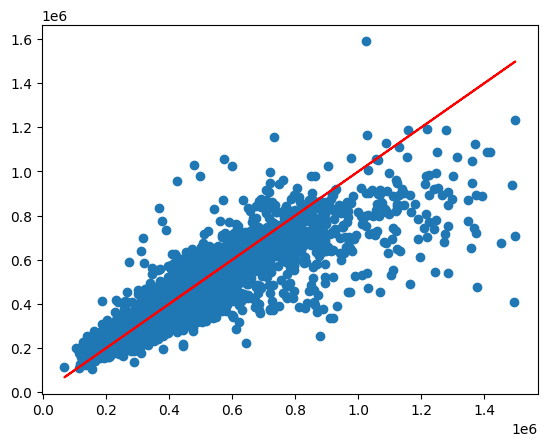

In [173]:
# Vizulaize the linear regression
plt.scatter(y_pred_df['Actual'], y_pred_df['Predicted'])
plt.plot(y_pred_df['Actual'], y_pred_df['Actual'], color='red')
plt.show()